In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# feature extraction

In [ ]:
import os
import librosa
import pandas as pd

# Define the path to the main folder containing all the inner folders
main_folder = "/content/drive/MyDrive/AUDIO"

# Create an empty list to store the features and labels
features = []

# Loop through all the inner folders in the main folder
for folder in os.listdir(main_folder):
    inner_folder_path = os.path.join(main_folder, folder)
    if os.path.isdir(inner_folder_path):  # Make sure it's a folder
        # Loop through all the audio files in the inner folder
        for filename in os.listdir(inner_folder_path):
            if filename.endswith(".wav"):
                file_path = os.path.join(inner_folder_path, filename)
                # Load the audio file
                y, sr = librosa.load(file_path)
                # Extract the MFCC features
                mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
                # Calculate the mean of the MFCCs (to simplify, you can modify this as needed)
                mfccs_mean = mfccs.mean(axis=1).tolist()
                # Add the features and the folder name (label) to the features list
                features.append(mfccs_mean + [folder])


# Define column names for the DataFrame
column_names = ['deepfake_{}'.format(i) for i in range(1, 14)] + ['label']

# Create a pandas DataFrame from the features list
df = pd.DataFrame(features, columns=column_names)

df.head()

,deepfake_1,deepfake_2,deepfake_3,deepfake_4,deepfake_5,deepfake_6,deepfake_7,deepfake_8,deepfake_9,deepfake_10,deepfake_11,deepfake_12,deepfake_13,label
0,-342.948181,73.580589,-11.082105,-0.491440,-8.496953,-7.645751,-8.125127,-6.744979,-5.502048,-4.629906,-5.531293,-1.734609,-5.369092,FAKE
1,-346.886566,70.663986,-14.198172,-1.726647,-3.827846,-8.902974,-5.750141,-3.828119,-8.779136,-6.567701,2.143601,-8.430173,-2.347773,FAKE
2,-271.055511,99.149963,-19.926203,1.827676,-10.809439,-4.114848,-12.782681,-8.306321,-7.867039,-1.907397,-5.881211,-3.880788,-4.190567,FAKE
3,-276.820557,84.936806,-23.854198,-6.803752,-5.108935,-10.354589,-11.670986,-6.406674,-12.044894,-8.893580,1.076346,-10.739386,-3.039114,FAKE
4,-257.250244,96.830040,-21.471783,-4.175354,-11.693214,-15.588406,-9.367866,-8.477165,-12.692205,3.332559,-16.427025,-5.750184,-6.817853,FAKE


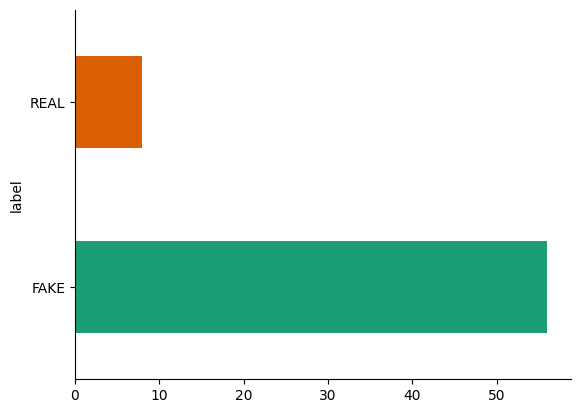

In [ ]:
# @title label

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df

,deepfake_1,deepfake_2,deepfake_3,deepfake_4,deepfake_5,deepfake_6,deepfake_7,deepfake_8,deepfake_9,deepfake_10,deepfake_11,deepfake_12,deepfake_13,label
0,-342.948181,73.580589,-11.082105,-0.491440,-8.496953,-7.645751,-8.125127,-6.744979,-5.502048,-4.629906,-5.531293,-1.734609,-5.369092,FAKE
1,-346.886566,70.663986,-14.198172,-1.726647,-3.827846,-8.902974,-5.750141,-3.828119,-8.779136,-6.567701,2.143601,-8.430173,-2.347773,FAKE
2,-271.055511,99.149963,-19.926203,1.827676,-10.809439,-4.114848,-12.782681,-8.306321,-7.867039,-1.907397,-5.881211,-3.880788,-4.190567,FAKE
3,-276.820557,84.936806,-23.854198,-6.803752,-5.108935,-10.354589,-11.670986,-6.406674,-12.044894,-8.893580,1.076346,-10.739386,-3.039114,FAKE
4,-257.250244,96.830040,-21.471783,-4.175354,-11.693214,-15.588406,-9.367866,-8.477165,-12.692205,3.332559,-16.427025,-5.750184,-6.817853,FAKE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-273.576569,86.272354,-22.510695,14.258929,-8.574966,-18.435637,-19.033485,-8.592813,-9.958231,0.094799,-13.147628,-3.325779,-12.213192,REAL
60,-434.053375,107.210381,-33.739788,0.963119,-19.446568,0.280589,-10.278035,-4.052761,-6.129616,2.227504,0.126305,1.786205,-0.703589,REAL
61,-349.351929,97.087204,-11.314984,7.382721,-4.578024,-2.081509,-21.578035,-13.981963,-15.499442,-11.203363,-8.291728,-2.829177,-10.226497,REAL
62,-338.357849,40.913731,-0.137185,14.077714,-15.050439,-9.313992,-17.792356,-8.820735,-12.171140,-7.764439,-10.446842,-6.575906,-10.960004,REAL


In [ ]:
df.to_csv('/content/drive/MyDrive/DATASET-balanced.csv',index=False)

# Model build

In [ ]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import log_loss,cohen_kappa_score
from imblearn.metrics import geometric_mean_score
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/DATASET-balanced.csv')
df

,deepfake_1,deepfake_2,deepfake_3,deepfake_4,deepfake_5,deepfake_6,deepfake_7,deepfake_8,deepfake_9,deepfake_10,deepfake_11,deepfake_12,deepfake_13,label
0,-342.948181,73.580589,-11.082105,-0.491440,-8.496953,-7.645751,-8.125127,-6.744979,-5.502048,-4.629906,-5.531293,-1.734609,-5.369092,FAKE
1,-346.886566,70.663986,-14.198172,-1.726647,-3.827846,-8.902974,-5.750141,-3.828119,-8.779136,-6.567701,2.143601,-8.430173,-2.347773,FAKE
2,-271.055511,99.149963,-19.926203,1.827676,-10.809439,-4.114848,-12.782681,-8.306321,-7.867039,-1.907397,-5.881211,-3.880788,-4.190567,FAKE
3,-276.820557,84.936806,-23.854198,-6.803752,-5.108935,-10.354589,-11.670986,-6.406674,-12.044894,-8.893580,1.076346,-10.739386,-3.039114,FAKE
4,-257.250244,96.830040,-21.471783,-4.175354,-11.693214,-15.588406,-9.367866,-8.477165,-12.692205,3.332559,-16.427025,-5.750184,-6.817853,FAKE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,-273.576569,86.272354,-22.510695,14.258929,-8.574966,-18.435637,-19.033485,-8.592813,-9.958231,0.094799,-13.147628,-3.325779,-12.213192,REAL
60,-434.053375,107.210381,-33.739788,0.963119,-19.446568,0.280589,-10.278035,-4.052761,-6.129616,2.227504,0.126305,1.786205,-0.703589,REAL
61,-349.351929,97.087204,-11.314984,7.382721,-4.578024,-2.081509,-21.578035,-13.981963,-15.499442,-11.203363,-8.291728,-2.829177,-10.226497,REAL
62,-338.357849,40.913731,-0.137185,14.077714,-15.050439,-9.313992,-17.792356,-8.820735,-12.171140,-7.764439,-10.446842,-6.575906,-10.960004,REAL


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   deepfake_1   64 non-null     float64
 1   deepfake_2   64 non-null     float64
 2   deepfake_3   64 non-null     float64
 3   deepfake_4   64 non-null     float64
 4   deepfake_5   64 non-null     float64
 5   deepfake_6   64 non-null     float64
 6   deepfake_7   64 non-null     float64
 7   deepfake_8   64 non-null     float64
 8   deepfake_9   64 non-null     float64
 9   deepfake_10  64 non-null     float64
 10  deepfake_11  64 non-null     float64
 11  deepfake_12  64 non-null     float64
 12  deepfake_13  64 non-null     float64
 13  label        64 non-null     object 
dtypes: float64(13), object(1)
memory usage: 7.1+ KB


In [ ]:
df['label'].value_counts()

,count
label,
FAKE,56
REAL,8


In [ ]:
pip install numpy pandas scikit-learn imbalanced-learn


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Example of loading data
# Replace this with your actual data loading step
# Assuming 'data.csv' has features in columns and target in the last column
data = pd.read_csv('/content/drive/MyDrive/DATASET-balanced.csv')

# Split features and target
X = data.iloc[:, :-1]  # Features (all columns except the last one)
y = data.iloc[:, -1]   # Target (last column)

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Transform categorical labels to numerical

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Output the class distribution before and after SMOTE
print("Original dataset shape:", np.bincount(y_train))
print("Resampled dataset shape:", np.bincount(y_train_resampled))

# Plotting the class distribution before and after SMOTE
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
ax[0].bar(np.arange(len(np.bincount(y_train))), np.bincount(y_train), color='orange')
ax[0].set_title('Class Distribution Before SMOTE')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Frequency')

# After SMOTE
ax[1].bar(np.arange(len(np.bincount(y_train_resampled))), np.bincount(y_train_resampled), color='lightgreen')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


Original dataset shape: [38  6]
Resampled dataset shape: [38 38]


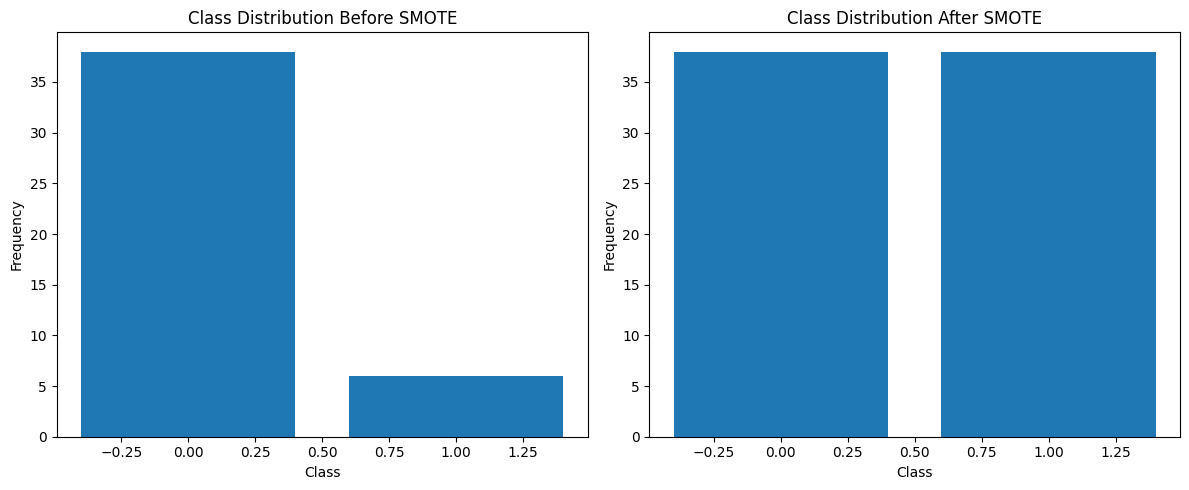

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Example of loading data
# Replace this with your actual data loading step
# Assuming 'data.csv' has features in columns and target in the last column
data = pd.read_csv('/content/drive/MyDrive/DATASET-balanced.csv')

# Split features and target
X = data.iloc[:, :-1]  # Features (all columns except the last one)
y = data.iloc[:, -1]   # Target (last column)

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Transform categorical labels to numerical

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to the training set
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Output the class distribution before and after SMOTE
print("Original dataset shape:", np.bincount(y_train))
print("Resampled dataset shape:", np.bincount(y_train_resampled))

# Plotting the class distribution before and after SMOTE
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
ax[0].bar(np.arange(len(np.bincount(y_train))), np.bincount(y_train))
ax[0].set_title('Class Distribution Before SMOTE')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Frequency')

# After SMOTE
ax[1].bar(np.arange(len(np.bincount(y_train_resampled))), np.bincount(y_train_resampled))
ax[1].set_title('Class Distribution After SMOTE')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df['label']=le.fit_transform(df['label'])
df['label'].value_counts()

,count
label,
0,56
1,8


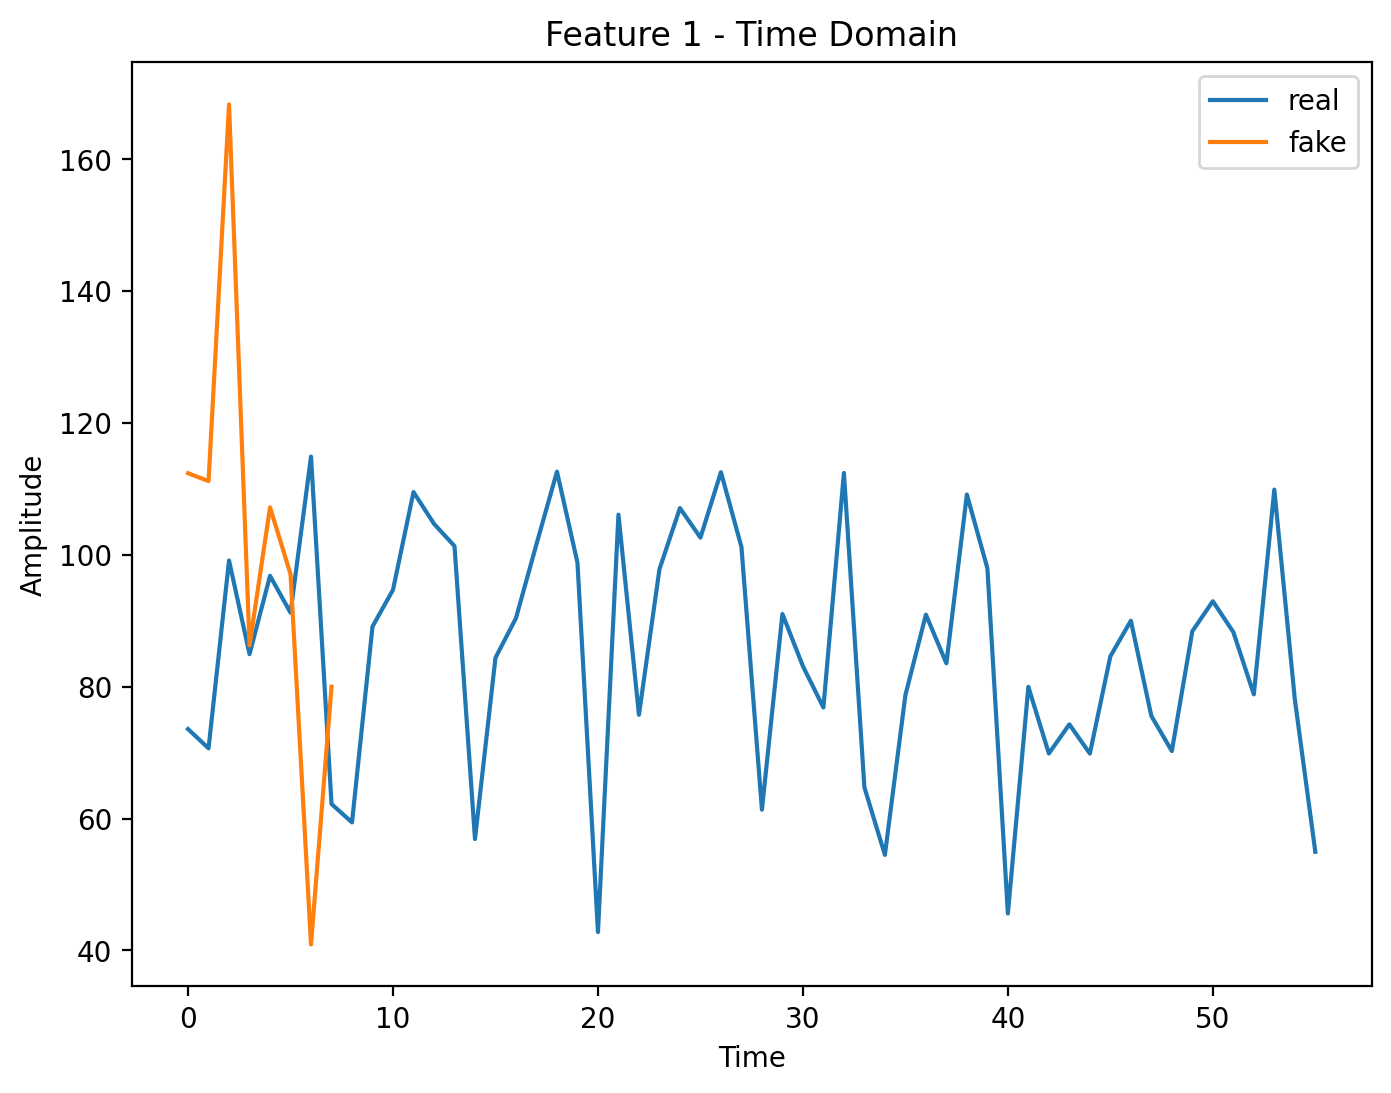

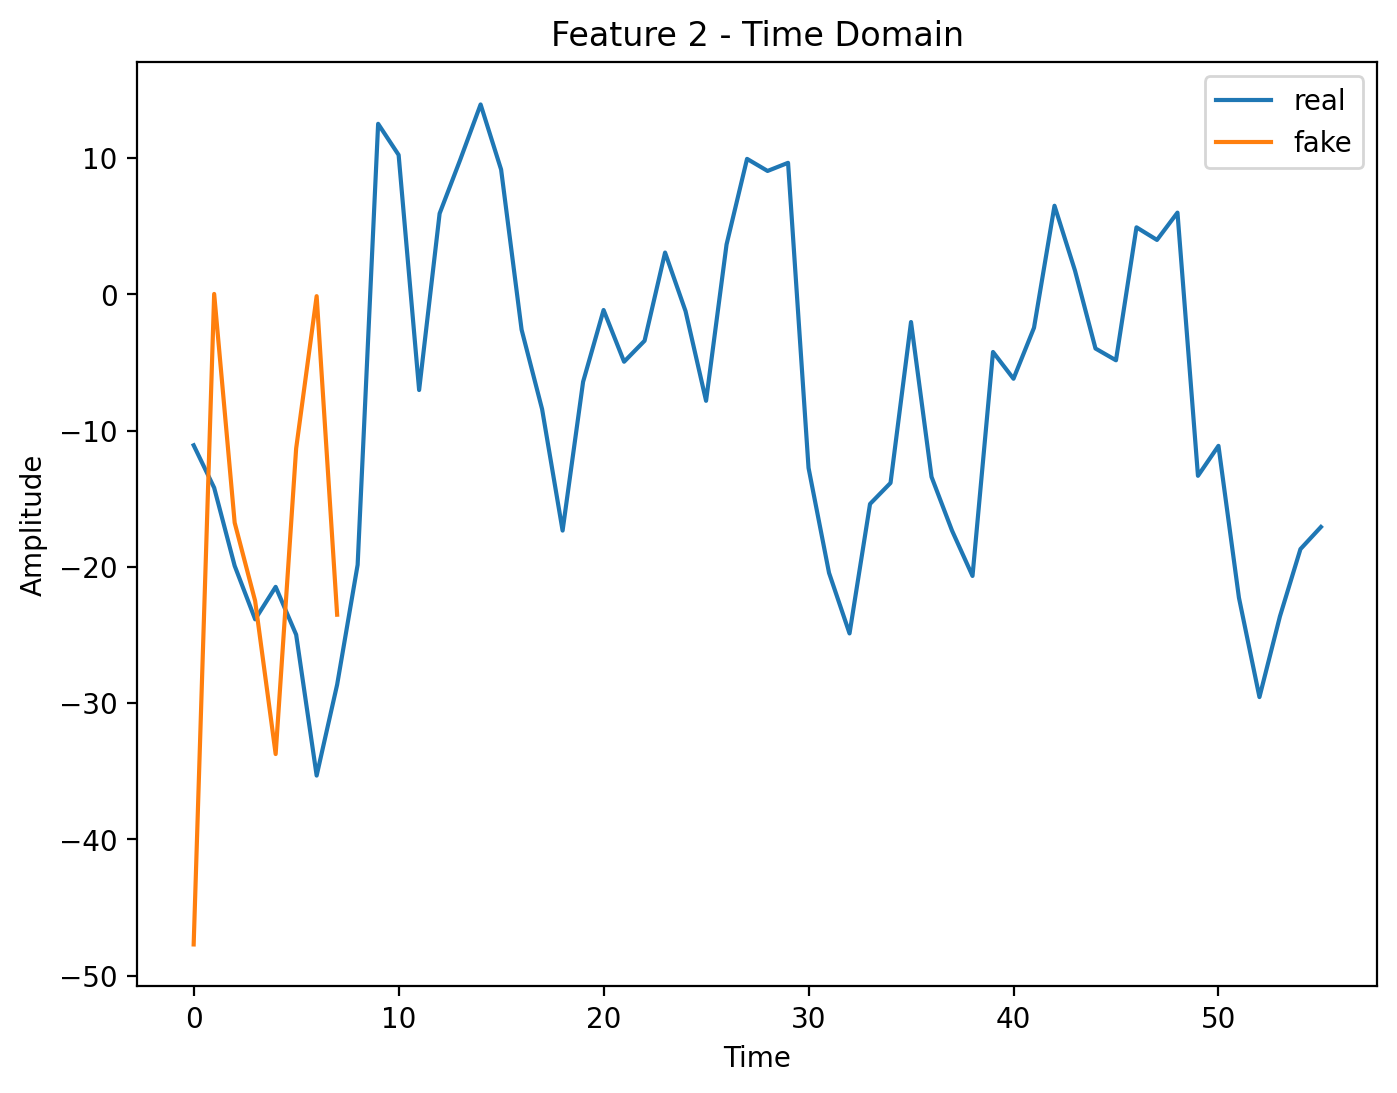

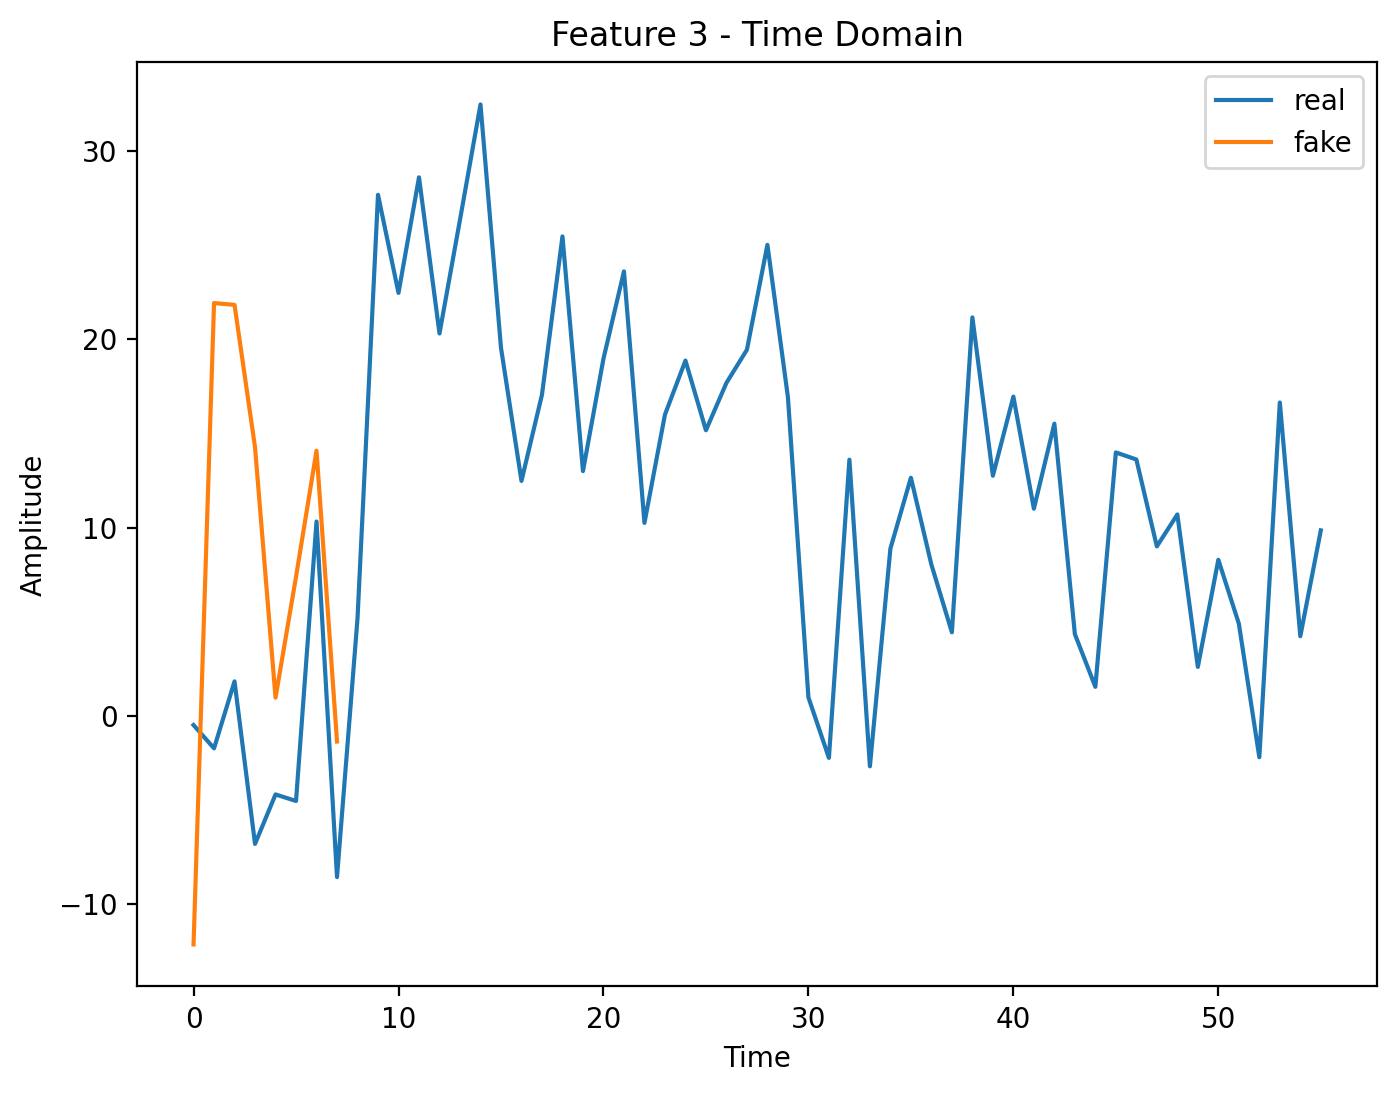

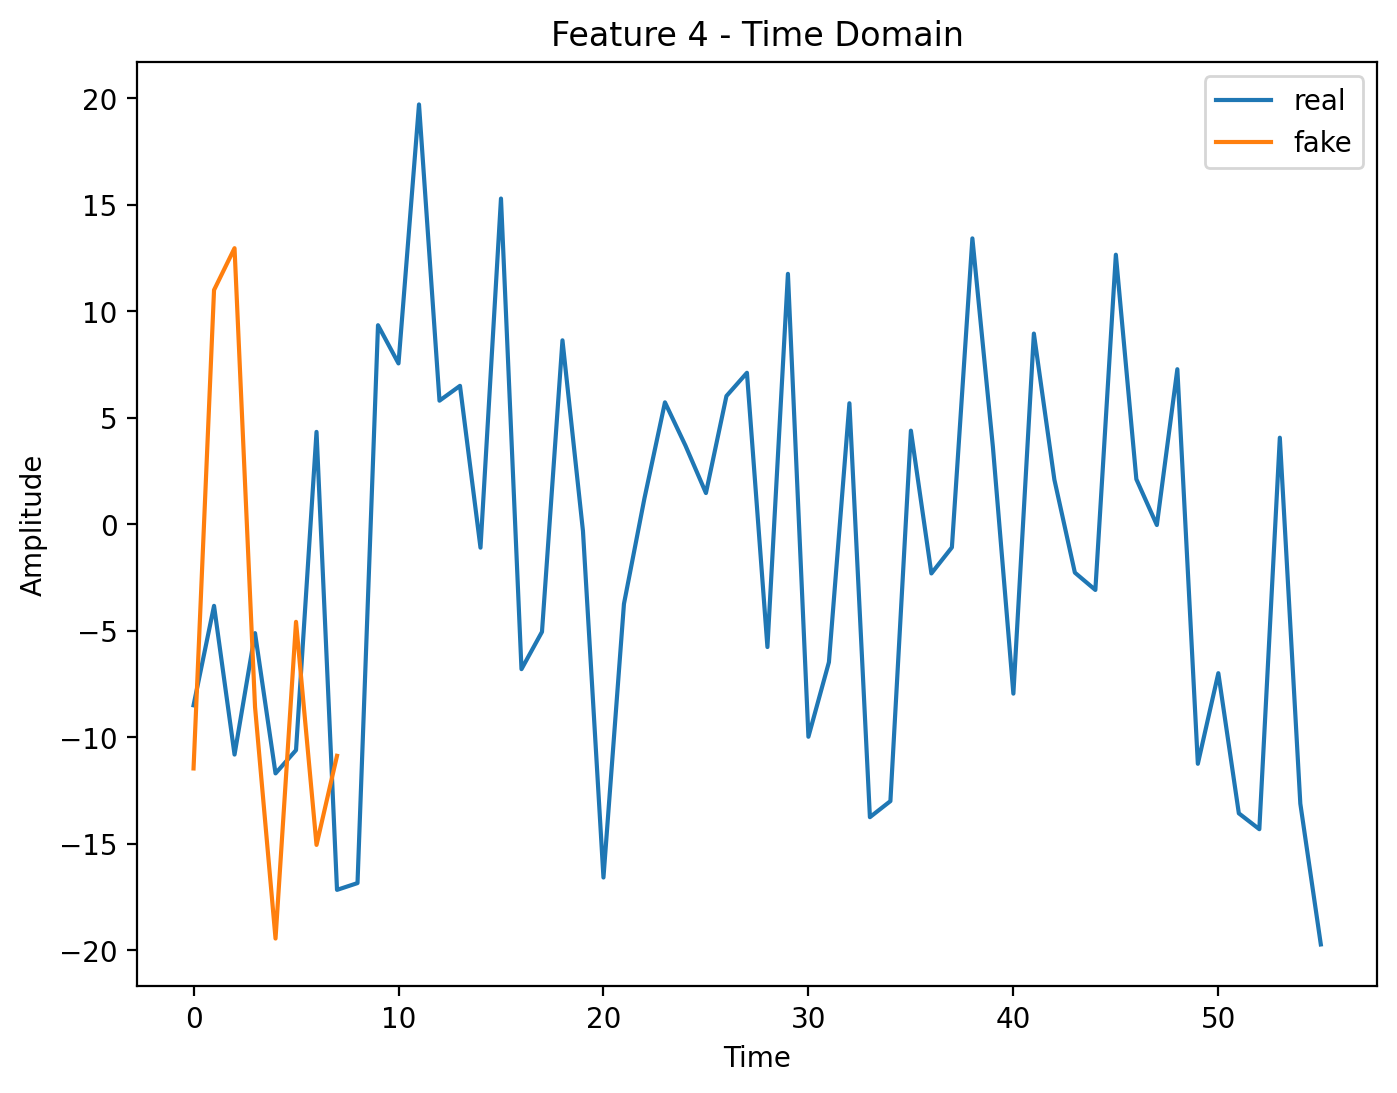

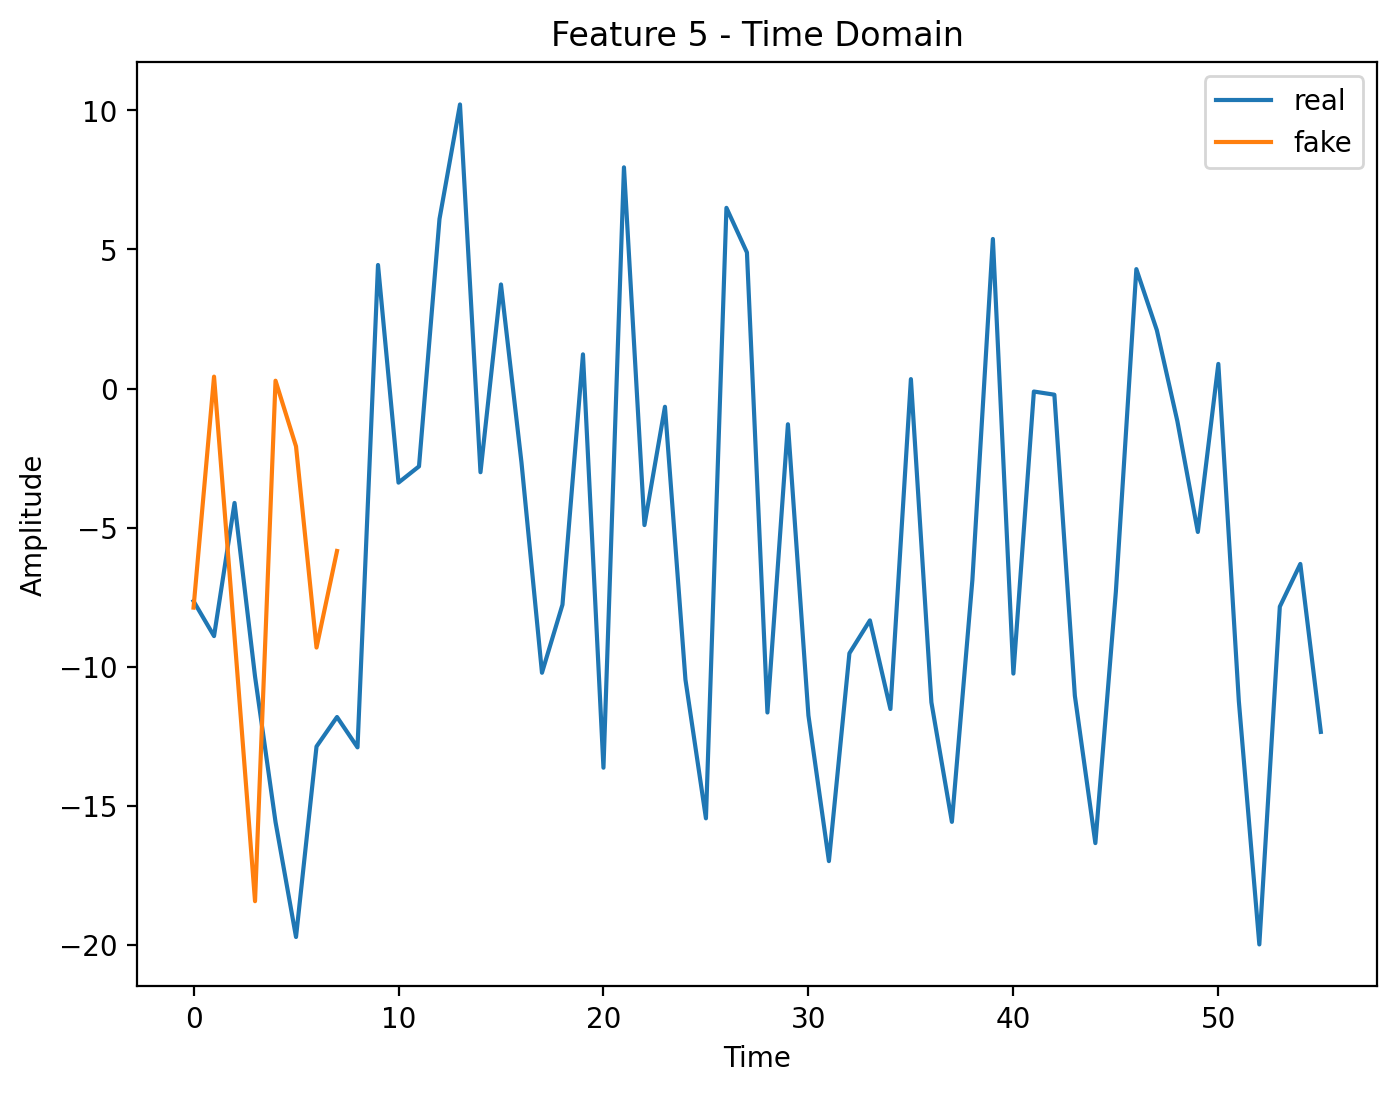

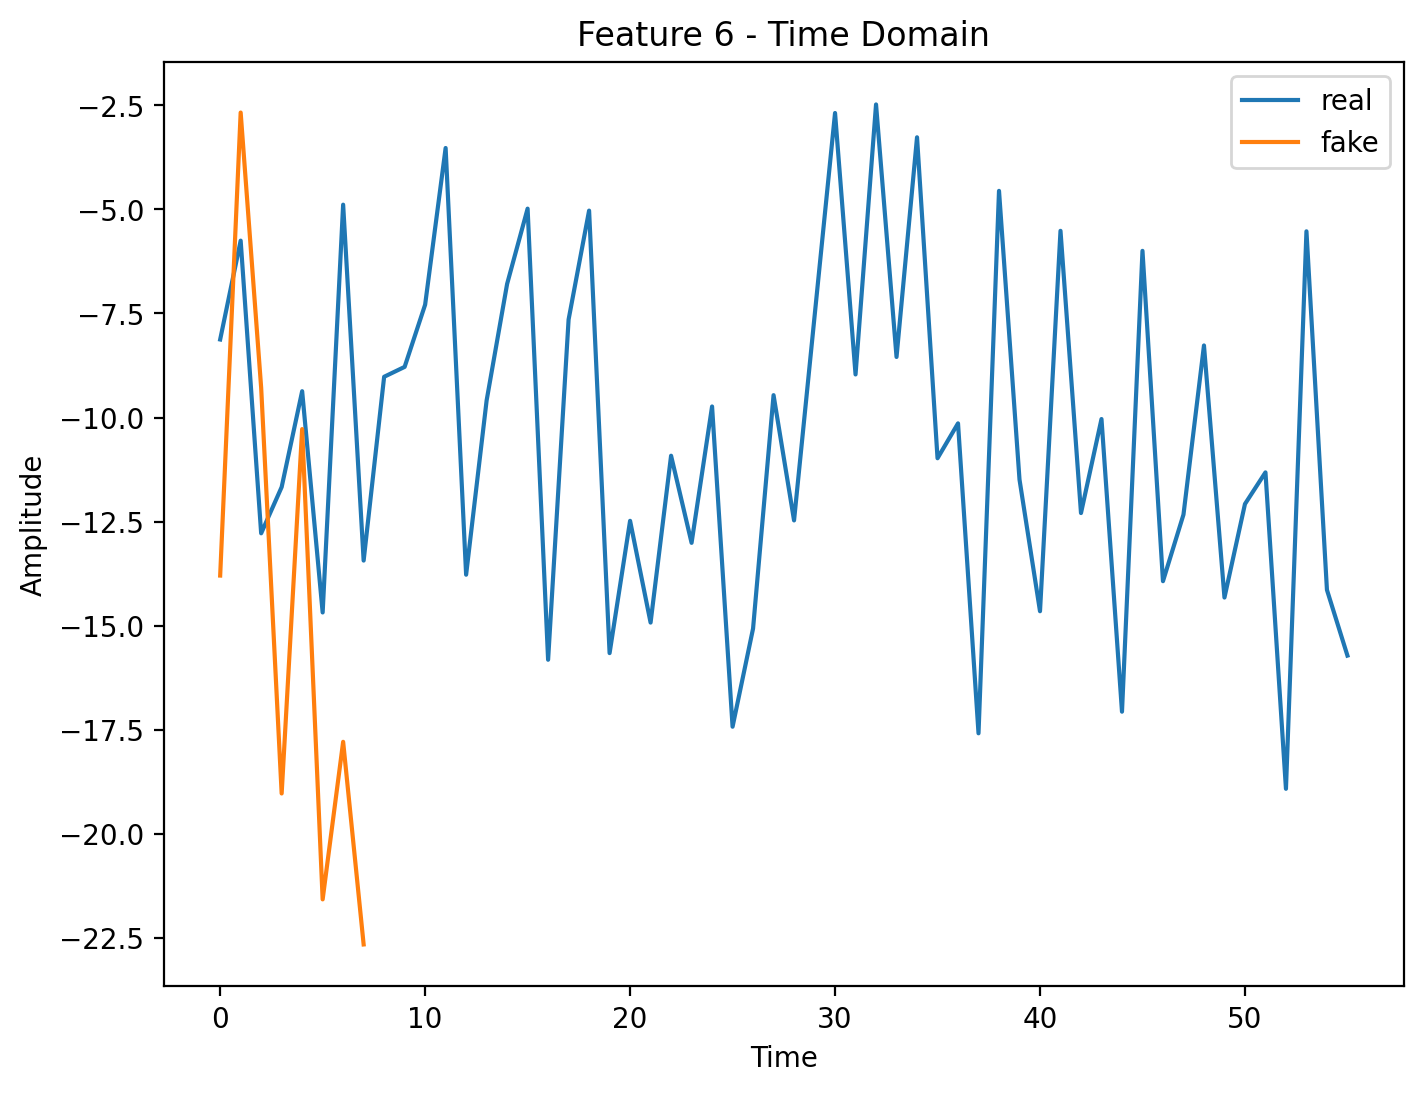

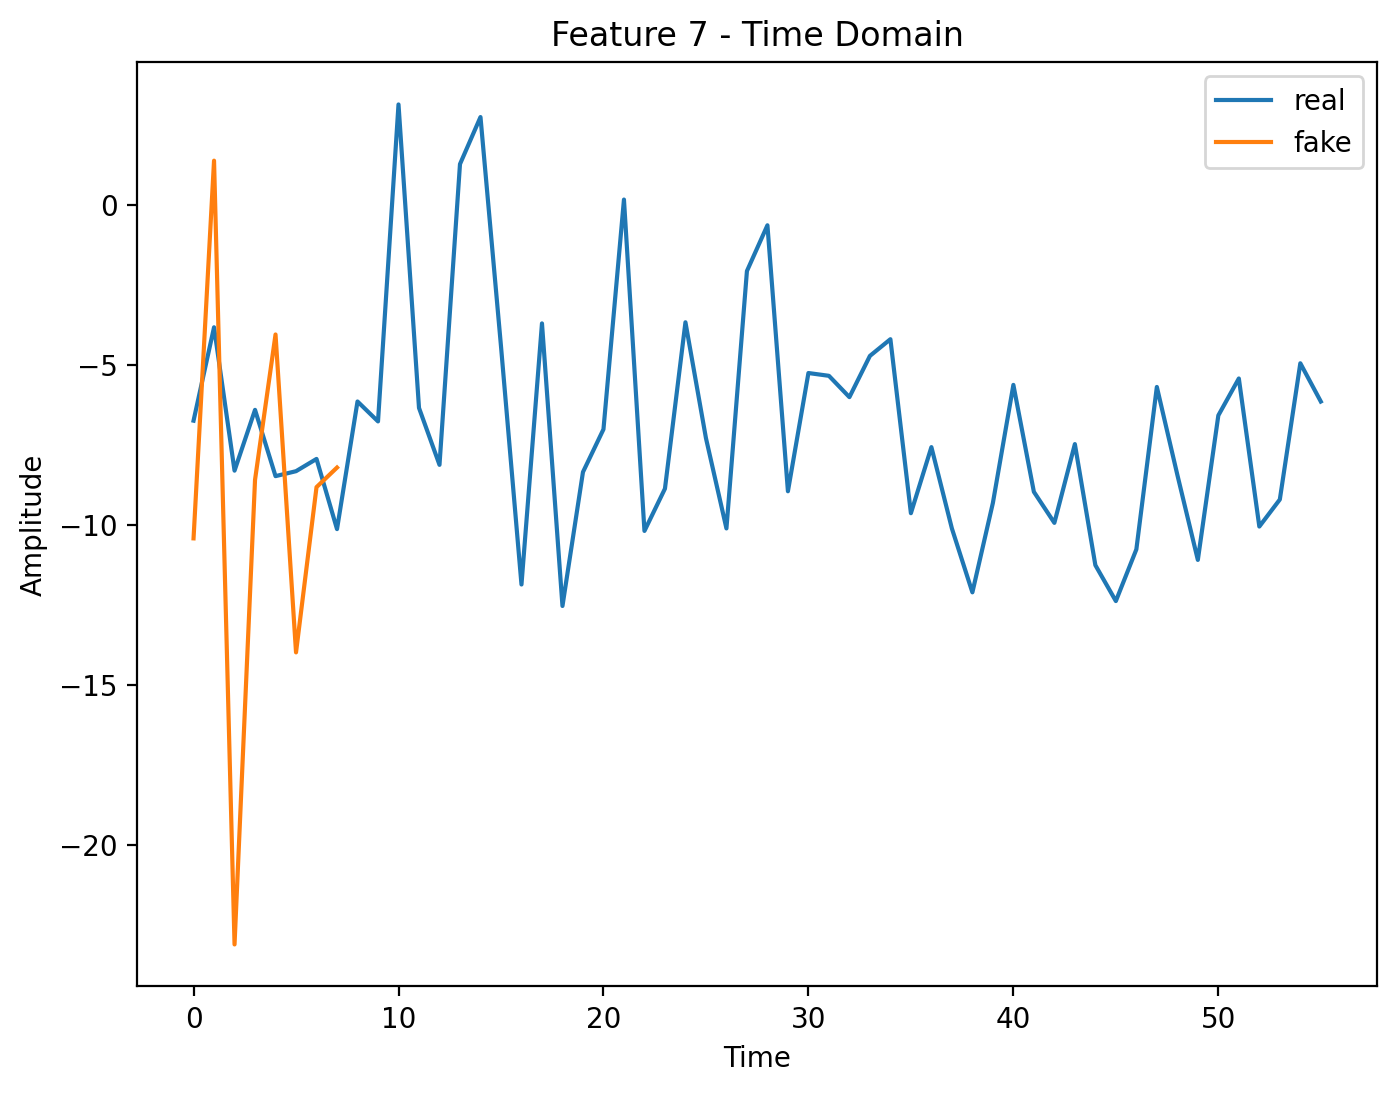

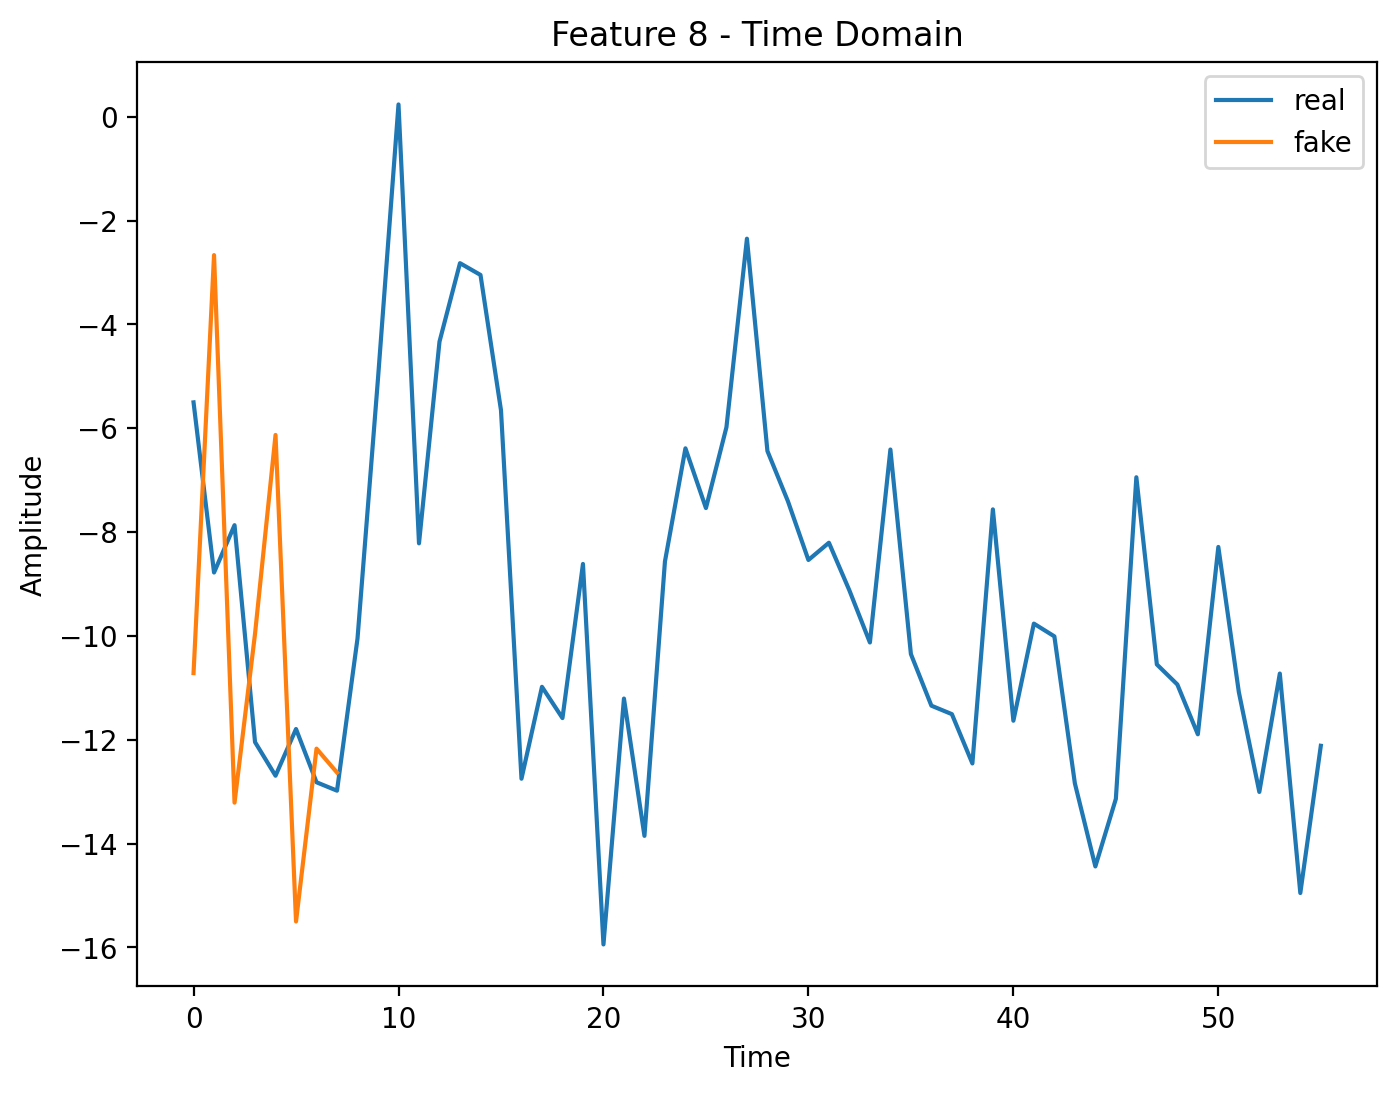

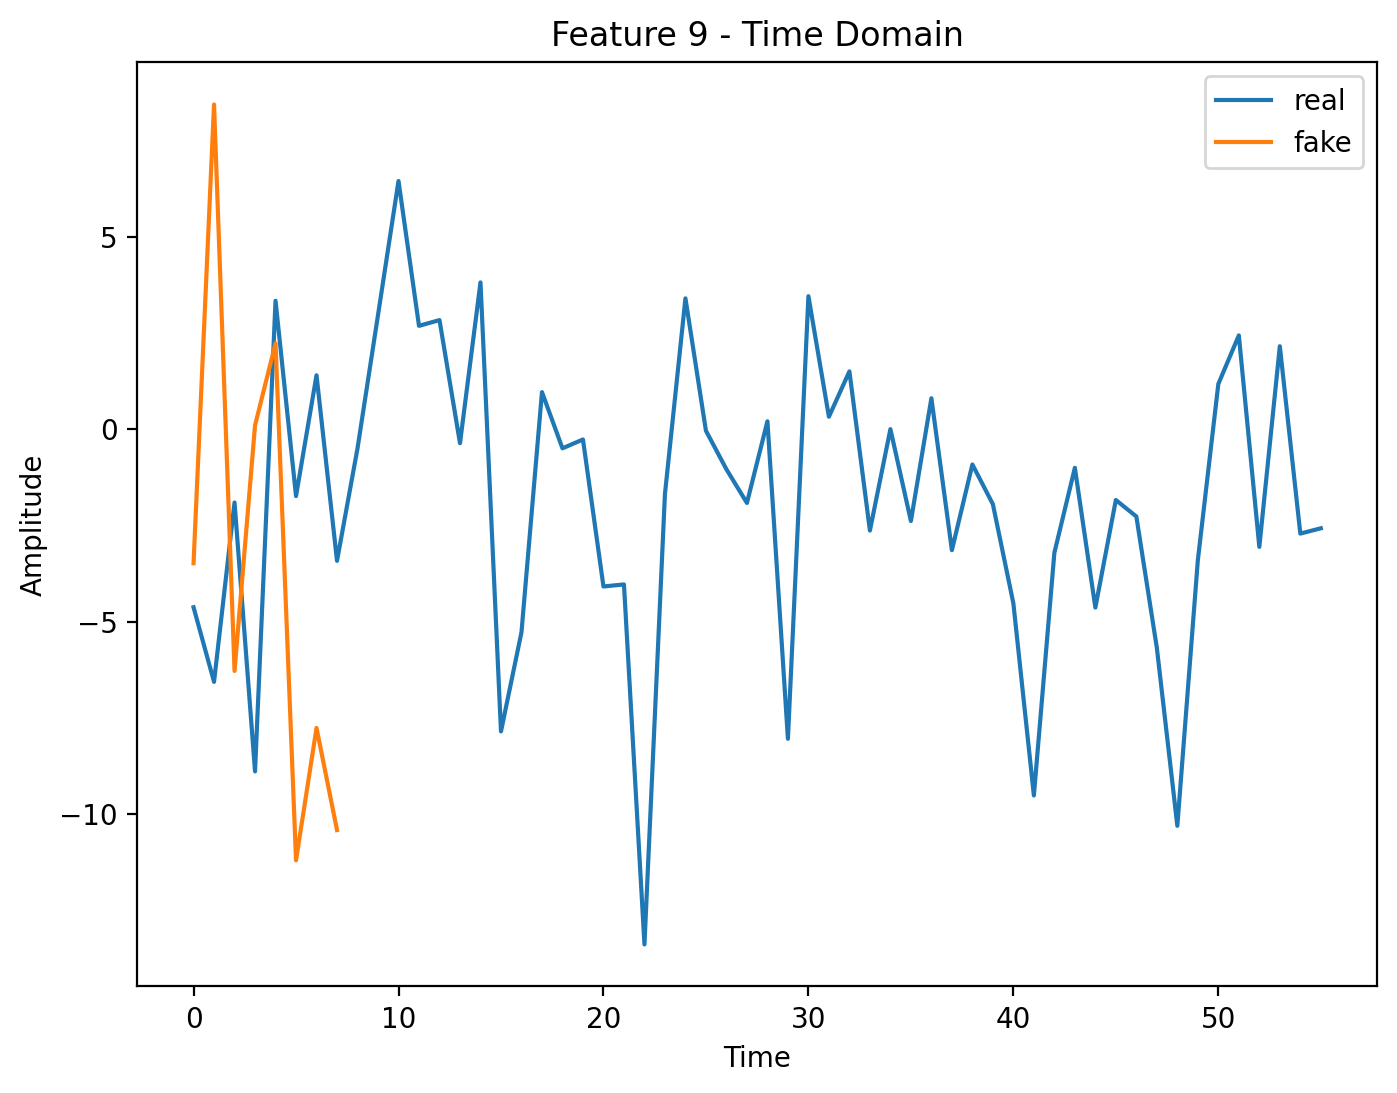

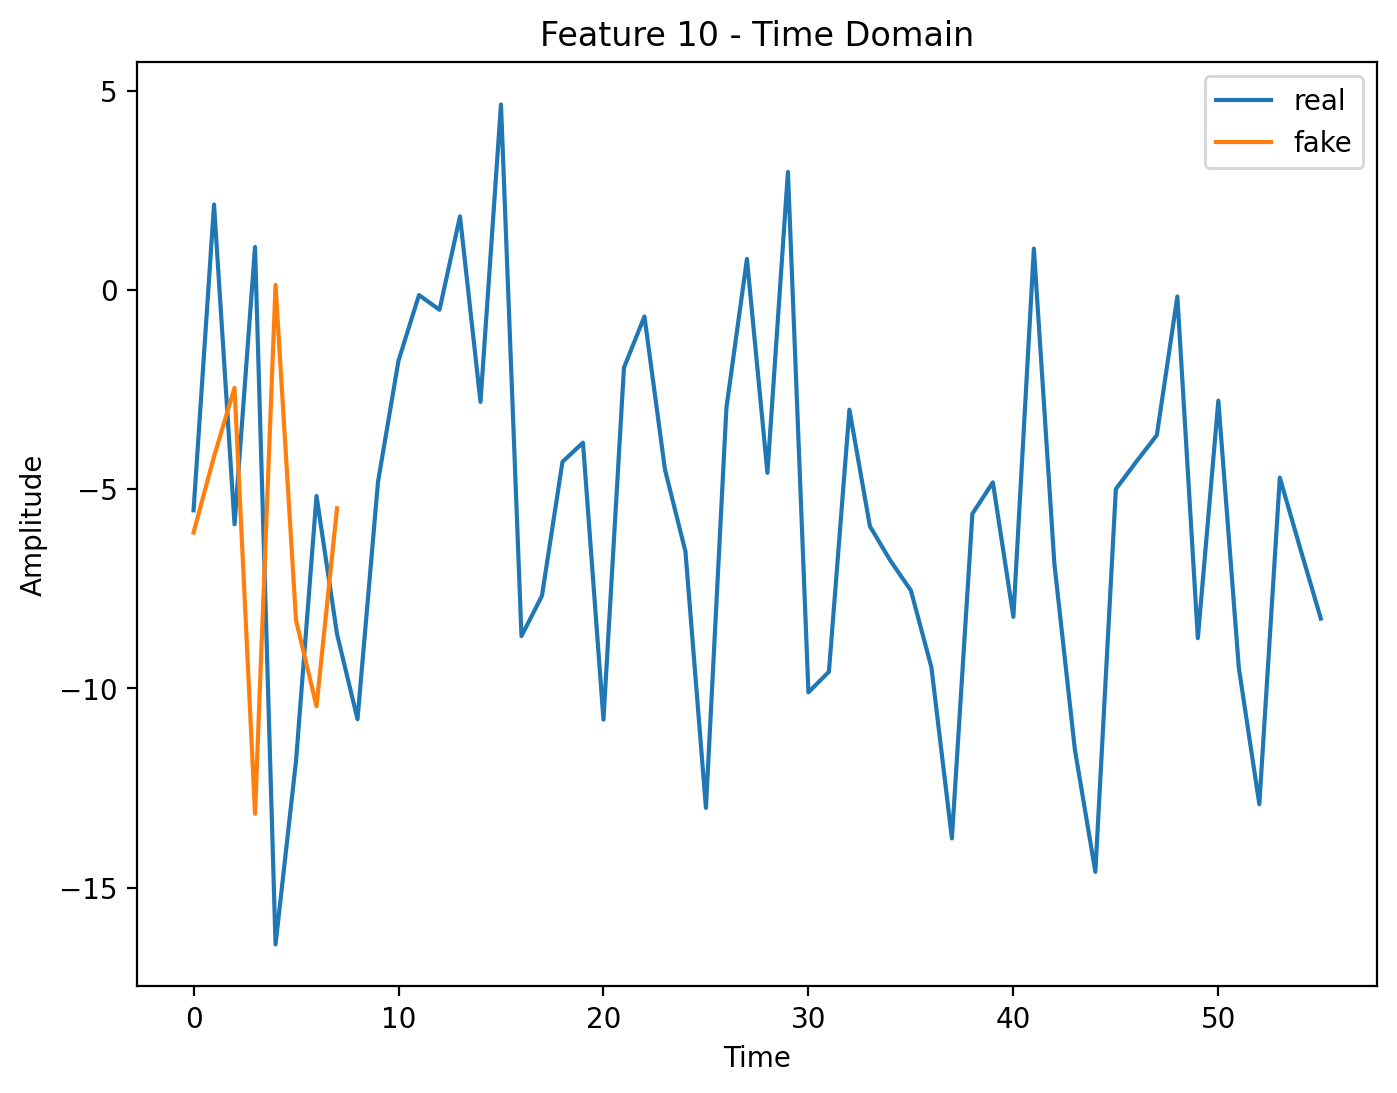

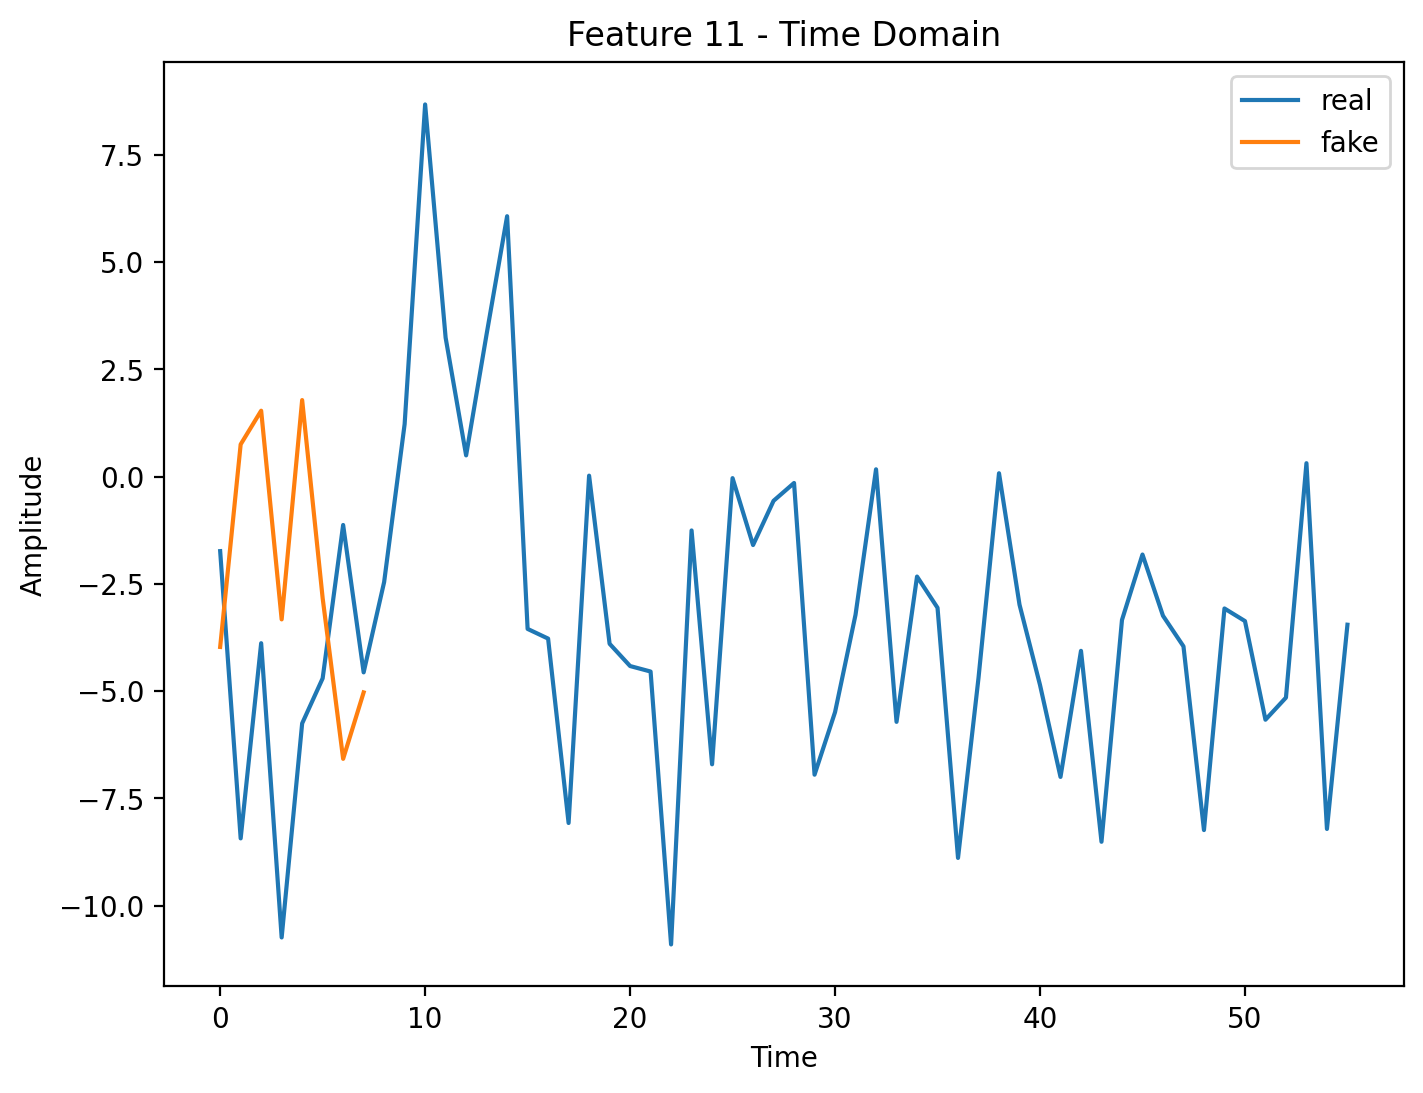

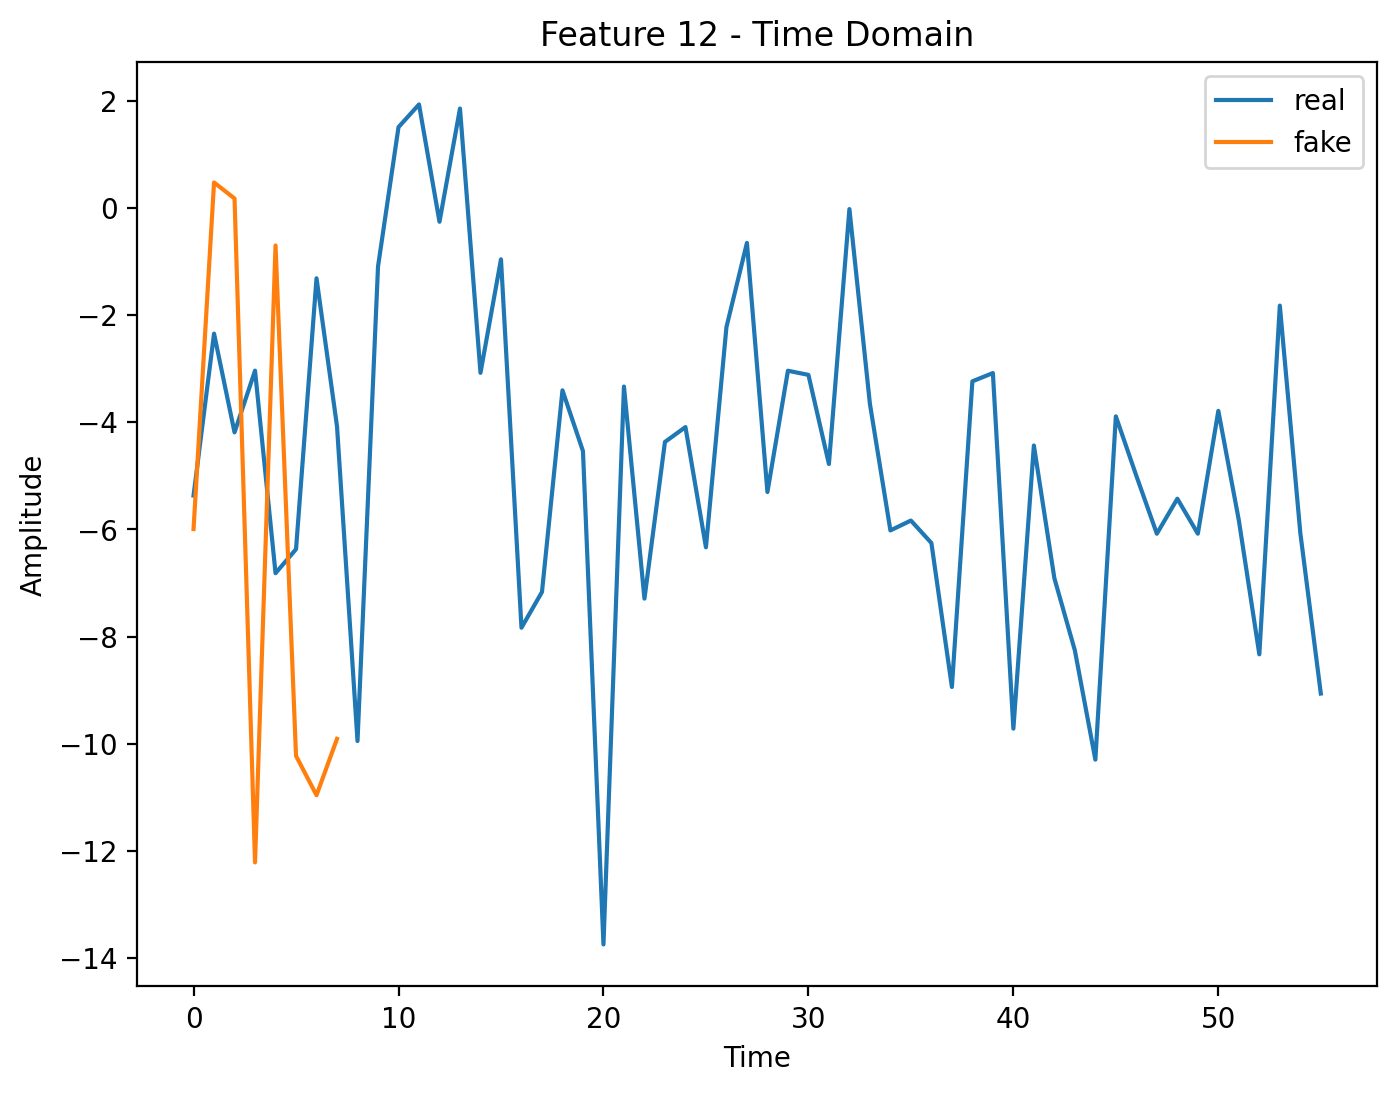

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data into pandas dataframe
# data = pd.read_csv('filename.csv')

# Assuming df contains your data
# Extract features and labels from dataframe
features = df.iloc[:, 1:-1].values
labels = df.iloc[:, -1].values

# Define the emotions you're interested in
Deepfake_of_interest = ["real", "fake"]  # This variable is already defined

# Plot time domain graphs for each feature and target label
for i in range(features.shape[1]):
    plt.figure(figsize=(8, 6), dpi=200)
    for emotion_label in range(len(Deepfake_of_interest)):  # Use Deepfake_of_interest here
        emotion_name = Deepfake_of_interest[emotion_label]
        plt.plot(features[labels == emotion_label, i], label=emotion_name)
    plt.title(f'Feature {i+1} - Time Domain')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.show()



In [ ]:
y=df['label']
x=df.drop(['label'],axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = 0.2,random_state=0,shuffle=True)

## Results with mfcc features

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time # Import the time module

print("RF")
clf = RandomForestClassifier(n_estimators=30,max_depth=30, random_state=0)
start = time.time() # Now you can use time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf = RandomForestClassifier(n_estimators=30,max_depth=30, random_state=0)
score = cross_val_score(clf, x, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

RF
Training time: 0.048734426498413086s
accuracy score 0.9230769230769231
error rate: 0.07692307692307687
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.50      0.67         2

    accuracy                           0.92        13
   macro avg       0.96      0.75      0.81        13
weighted avg       0.93      0.92      0.91        13

0.8548 accuracy with a standard deviation of 0.0894


array([[11,  0],
       [ 1,  1]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=2)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf = KNeighborsClassifier(n_neighbors=3)
score = cross_val_score(clf, x, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

Training time: 0.006152629852294922s
accuracy score 0.8461538461538461
error rate: 0.15384615384615385
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       0.00      0.00      0.00         2

    accuracy                           0.85        13
   macro avg       0.42      0.50      0.46        13
weighted avg       0.72      0.85      0.78        13

0.8595 accuracy with a standard deviation of 0.1093


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[11,  0],
       [ 2,  0]])

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=500,solver='liblinear')
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf = LogisticRegression(random_state=0,max_iter=500,solver='liblinear')
score = cross_val_score(clf, x, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

Training time: 0.011685848236083984s
accuracy score 0.7692307692307693
error rate: 0.23076923076923073
              precision    recall  f1-score   support

           0       0.83      0.91      0.87        11
           1       0.00      0.00      0.00         2

    accuracy                           0.77        13
   macro avg       0.42      0.45      0.43        13
weighted avg       0.71      0.77      0.74        13

0.9071 accuracy with a standard deviation of 0.0996


array([[10,  1],
       [ 2,  0]])

In [ ]:
from sklearn.naive_bayes import GaussianNB
print("GNB")
clf = GaussianNB()
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf = GaussianNB()
score = cross_val_score(clf, x, y, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

GNB
Training time: 0.0047245025634765625s
accuracy score 0.9230769230769231
error rate: 0.07692307692307687
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.50      0.67         2

    accuracy                           0.92        13
   macro avg       0.96      0.75      0.81        13
weighted avg       0.93      0.92      0.91        13

0.8952 accuracy with a standard deviation of 0.1305


array([[11,  0],
       [ 1,  1]])

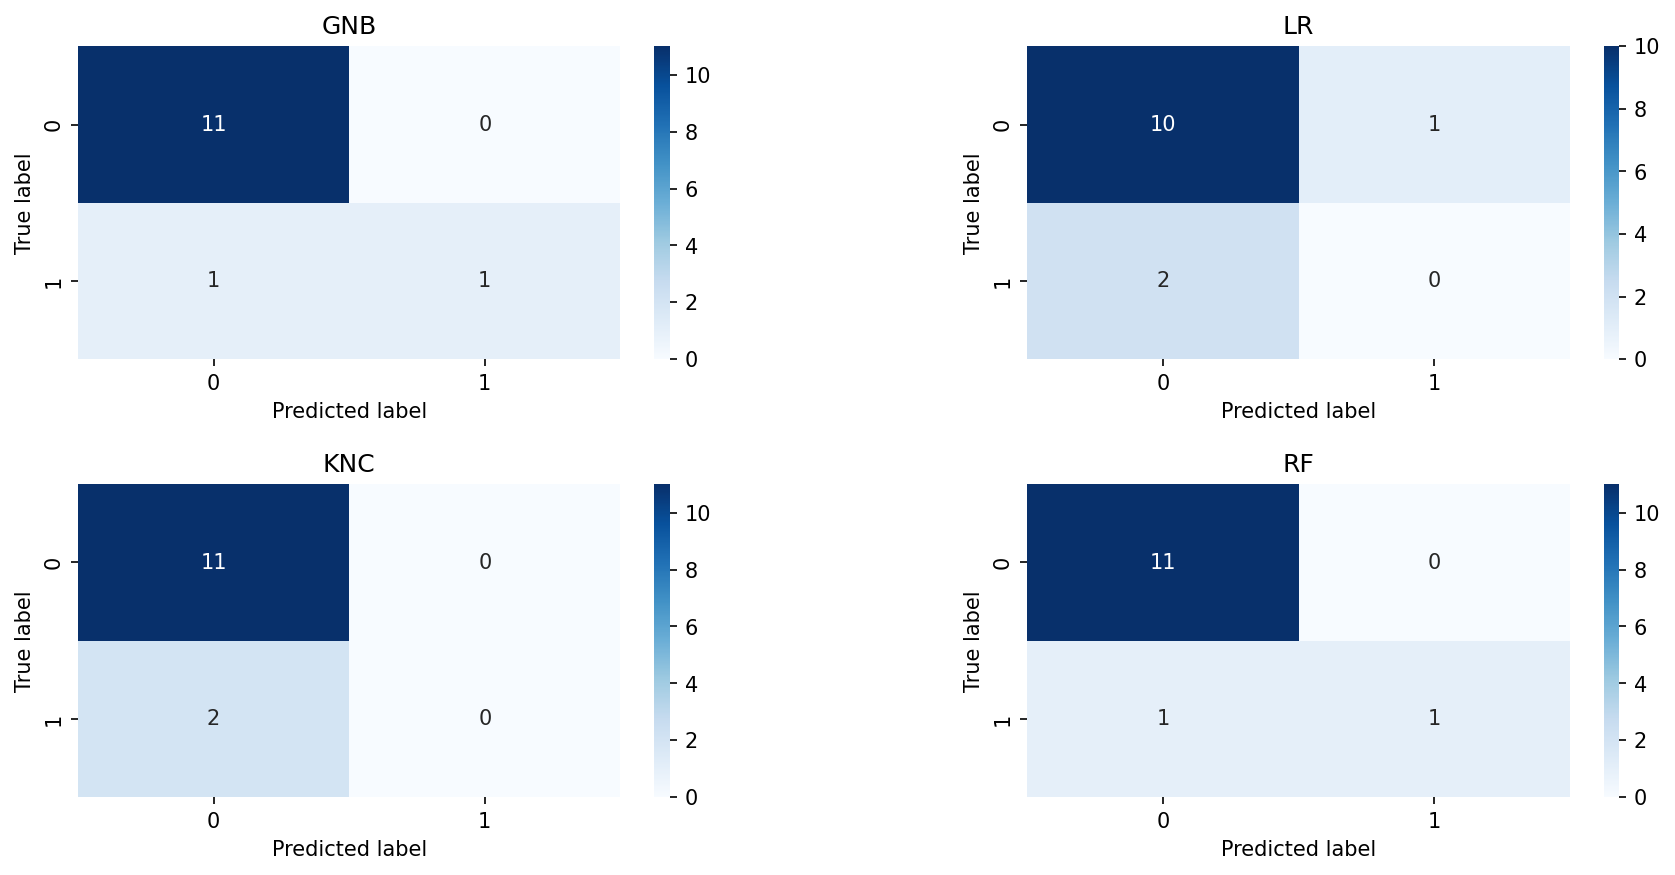

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

array1 = np.array([[11, 0],
                   [1, 1]])

array2 = np.array([[10, 1],
                   [2, 0]])

array3 = np.array([[11, 0],
                   [2, 0]])

array4 = np.array([[11, 0],
                   [1, 1]])



# Create a figure with 8 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 6.5), dpi=150)

# Create a list of confusion matrices and corresponding titles
cms = [array1, array2, array3, array4]
titles = ['GNB', 'LR', 'KNC', 'RF']

# Plot each confusion matrix as a heatmap on a subplot
for ax, cm, title in zip(axes.flat, cms, titles):
    sns.heatmap(cm, annot=True, cmap='Blues', ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)

# Display the figure
plt.savefig('froncmmfcc.pdf')
plt.show()


## Results with probablity

> Add blockquote



In [ ]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import NMF
from sklearn.preprocessing import MinMaxScaler

# Create polynomial features (if needed for future use)
# poly = PolynomialFeatures(degree=2)
# x_poly = poly.fit_transform(x)

# Extract features using NMF
nmf_model = NMF(n_components=2, init='random', random_state=0)

# Scale the data to the range [0, 1] to ensure non-negativity
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)  # Scale the input data 'x'

# Apply NMF to the scaled data
xtrainimf = nmf_model.fit_transform(x_scaled)
pl = pd.DataFrame(xtrainimf)

# Initialize and train the GaussianNB model
gnb = GaussianNB()
gnbPre1 = gnb.fit(x, y).predict_proba(x)
gnb_df = pd.DataFrame(gnbPre1)


In [ ]:


result = pd.concat([pl,rf], axis=1).reindex(pl.index)
#result=pd.read_csv('/content/drive/MyDrive/childfeaturefused.csv')
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(result,y,test_size = 0.2,random_state=0,shuffle=True)
# result.columns=['1','2','3','4']



In [ ]:
result

,0,1,0,1
0,0.458788,0.310367,0.884490,0.115510
1,0.535949,0.258058,0.929144,0.070856
2,0.349945,0.457936,0.901612,0.098388
3,0.361042,0.354467,0.957923,0.042077
4,0.038932,0.672827,0.882858,0.117142
...,...,...,...,...
59,0.096364,0.546417,0.723588,0.276412
60,0.573590,0.210582,0.594153,0.405847
61,0.412117,0.117805,0.559612,0.440388
62,0.307863,0.252454,0.659405,0.340595


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time

print("RF")
clf = RandomForestClassifier(n_estimators=10,max_depth=10, random_state=0)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf = RandomForestClassifier(n_estimators=10,max_depth=10, random_state=0)

# Use X_train as the training data for cross-validation
score = cross_val_score(clf, X_train, Y_train, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

RF
Training time: 0.018041133880615234s
accuracy score 0.9230769230769231
error rate: 0.07692307692307687
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.50      0.67         2

    accuracy                           0.92        13
   macro avg       0.96      0.75      0.81        13
weighted avg       0.93      0.92      0.91        13

0.9600 accuracy with a standard deviation of 0.0800


array([[11,  0],
       [ 1,  1]])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf = KNeighborsClassifier(n_neighbors=3)

# Use the correct training data for cross-validation
score = cross_val_score(clf, X_train, Y_train, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

Training time: 0.007821798324584961s
accuracy score 0.9230769230769231
error rate: 0.07692307692307687
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.50      0.67         2

    accuracy                           0.92        13
   macro avg       0.96      0.75      0.81        13
weighted avg       0.93      0.92      0.91        13

0.9433 accuracy with a standard deviation of 0.0870


array([[11,  0],
       [ 1,  1]])

In [ ]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(random_state=0,max_iter=50,solver='liblinear')
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf = LogisticRegression(random_state=0,max_iter=50,solver='liblinear')
# Use X_train and Y_train for cross-validation, as they are the training set
score = cross_val_score(clf, X_train, Y_train, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

Training time: 0.006099700927734375s
accuracy score 0.8461538461538461
error rate: 0.15384615384615385
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        11
           1       0.00      0.00      0.00         2

    accuracy                           0.85        13
   macro avg       0.42      0.50      0.46        13
weighted avg       0.72      0.85      0.78        13

0.8867 accuracy with a standard deviation of 0.1492


array([[11,  0],
       [ 2,  0]])

In [ ]:
from sklearn.naive_bayes import GaussianNB
print("GNB")
clf = GaussianNB()
start = time.time()
clf.fit(X_train, Y_train)
stop = time.time()
print(f"Training time: {stop - start}s")
dtP3=clf.predict(X_test)
print('accuracy score',accuracy_score(Y_test,dtP3))
print('error rate:',1-accuracy_score(Y_test,dtP3))
print(classification_report(Y_test,dtP3))
kf = KFold(n_splits=10, shuffle=True)
clf = GaussianNB()
# Use X_train and Y_train for cross-validation
score = cross_val_score(clf, X_train, Y_train, cv= kf, scoring="accuracy")
print("%0.4f accuracy with a standard deviation of %0.4f" % (score.mean(), score.std()))
cf_matrix=confusion_matrix(Y_test,dtP3)
cf_matrix

GNB
Training time: 0.0057697296142578125s
accuracy score 1.0
error rate: 0.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00         2

    accuracy                           1.00        13
   macro avg       1.00      1.00      1.00        13
weighted avg       1.00      1.00      1.00        13

0.9600 accuracy with a standard deviation of 0.0800


array([[11,  0],
       [ 0,  2]])

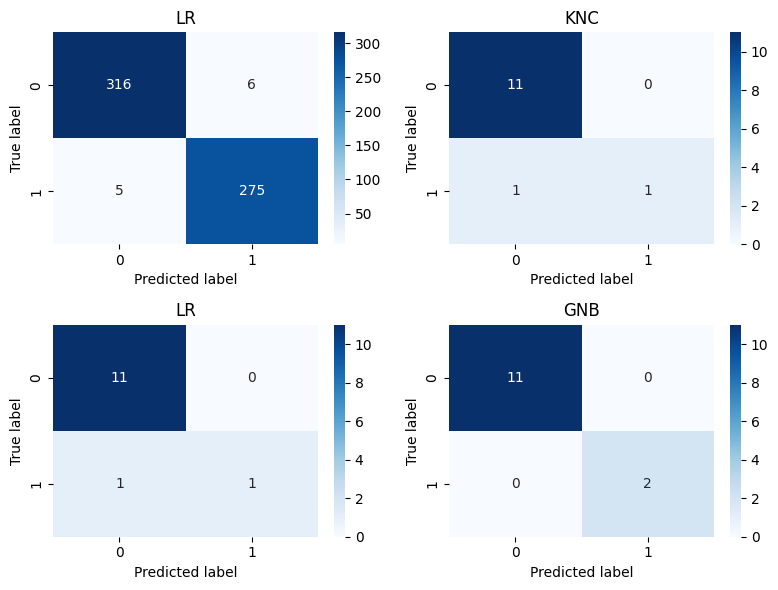

In [ ]:
array1=[[316,   6],
       [  5, 275]]

array2=[[11,  0],
       [ 1,  1]]

array3=[[11,  0],
       [ 1,  1]]

array4=[[11,  0],
       [ 0,  2]]

# Create a figure with 8 subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,6),dpi=100)

# Create a list of confusion matrices and corresponding titles
cms =    [array1, array2, array3, array4]
titles = ['LR'  ,'KNC',   'LR',   'GNB' ]

# Plot each confusion matrix as a heatmap on a subplot
for ax, cm, title in zip(axes.flat, cms, titles):
    sns.heatmap(cm, annot=True, cmap='Blues', ax=ax,fmt='g')
    ax.set_title(title)
    ax.set_xlabel('Predicted label')
    ax.set_ylabel('True label')
# axes.flat[-1].axis('off')
# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.4, wspace=0.4)
fig.tight_layout()
# Display the figure
# plt.savefig('froncm.pdf')
plt.show()

In [ ]:
!pip install hypertools



   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 3.6 MB/s eta 0:00:00


<Figure size 2000x1100 with 0 Axes>

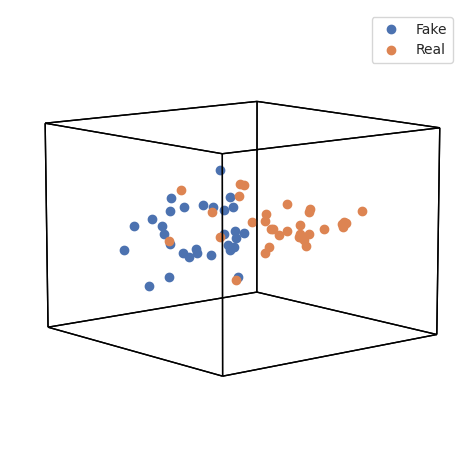

In [ ]:
import hypertools as hyp


plt.figure(figsize=(10, 5.5), dpi=200)
hyp.plot(result, 'o',group='Lables', legend=['Fake','Real'],n_clusters=2,palette="deep",azim=50)


plt.show()